In [1]:
import Gadget as G
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.mlab import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
from scipy.optimize import curve_fit
import numpy           as np
import math            as mt
import statistics      as st
import snap_blocks     as sb
import plots           as im
import plot_format     as pf
import global_fuctions as gf
import mpl_toolkits

/usr/lib64/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
mpl.style.use('classic')
font = {'family': 'sans-serif', 'size': 20, 'sans-serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('legend', **{'fontsize': 15}) 
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rc('lines', linewidth=3)

In [3]:
#declaration of paths
path_main = '/home/meugenia/Documentos/discos/'
path_snap = path_main+'snaps/etacs/'
path_save = path_main +'plots/'

In [4]:
snap = 'snapshot_110'
ids, x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint = sb.reading_snap(path_snap,snap,0)
ids_s,x_s,y_s,z_s,mass_s,rho_s,vx_s,vy_s,vz_s,bx_s,by_s,bz_s,vrms_s,hsml_s,eint_s = \
sb.sorting_by_ids(ids,x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint)
r=(x_s*x_s+y_s*y_s)**0.5

4 0.000100000696 0.14463791


/usr/lib64/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


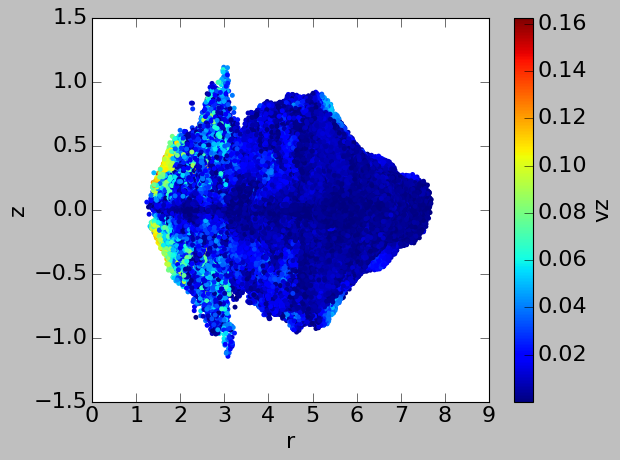

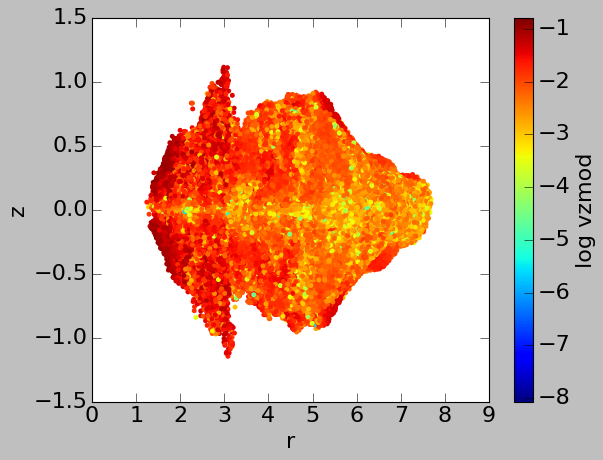

In [5]:
    limrho  = [0.0001,np.max(rho_s)]
    limeint = [0,0.015]
    
    sgvar = [x_s, y_s, z_s, r, rho_s, vx_s, vy_s, vz_s, bx_s, by_s, bz_s, vrms_s, eint_s]
    
    var   = [4,12]
    vlims = [limrho,limeint]
    
    for i in range(len(var)):
        #print vlims[i]
        if i==0:
            _sgvar=gf.sobgroup(sgvar,var[i],vlims[i])
            sgvar=_sgvar
            print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
        else:
            _sgvar=gf.sobgroup([sgvar[0][0],sgvar[1][0],sgvar[2][0],sgvar[3][0],sgvar[4][0],\
                               sgvar[5][0],sgvar[6][0],sgvar[7][0],sgvar[8][0],sgvar[9][0],\
                               sgvar[10][0],sgvar[11][0],sgvar[12][0]], var[i],vlims[i])
            sgvar=_sgvar
            #print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
            
            
    sgx,sgy,sgz,sgr,sgrho,sgvx,sgvy,sgvz,sgbx,sgby,sgbz,sgvrms,sgeint = gf.subgroup_all(_sgvar) 

    plt.scatter(sgr,sgz,c=abs(sgvz),edgecolor='none')
    plt.colorbar(label='vz')
    plt.xlabel('r')
    plt.ylabel('z')
    #plt.savefig(path_save+'cavidad/vz/'+snap+'.png', format='png', dpi=1500,bbox_inches='tight')
    plt.show()

    plt.scatter(sgr,sgz,c=np.log10(abs(sgvz)),edgecolor='none')
    plt.colorbar(label='log vzmod')
    plt.xlabel('r')
    plt.ylabel('z')
    #plt.savefig(path_save+'cavidad/vz/'+snap+'_log.png', format='png', dpi=1500,bbox_inches='tight')
    plt.show()


In [7]:
    limrho  = [0.,0.0001]
    limeint = [0.015,eint_s.max()]
    limx    = [-10,10]
    limy    = [-10,10]
    limz    = [-30,30]
    limr    = [0,20]
    limvz1   = [0.0,vz_s.max()]
    #limvz2   = [vz_s.min(),-1.2]
    
    sgvar = [x_s, y_s, z_s, r, rho_s, vx_s, vy_s, vz_s, bx_s, by_s, bz_s, vrms_s, eint_s]
    
    var   = [4,12,2,3]
    vlims = [limrho,limeint,limz,limr]
    
    for i in range(len(var)):
        #print vlims[i]
        if i==0:
            _sgvar=gf.sobgroup(sgvar,var[i],vlims[i])
            sgvar=_sgvar
            print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
        else:
            _sgvar=gf.sobgroup([sgvar[0][0],sgvar[1][0],sgvar[2][0],sgvar[3][0],sgvar[4][0],\
                               sgvar[5][0],sgvar[6][0],sgvar[7][0],sgvar[8][0],sgvar[9][0],\
                               sgvar[10][0],sgvar[11][0],sgvar[12][0]], var[i],vlims[i])
            sgvar=_sgvar
            #print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
            
            
    sgx,sgy,sgz,sgr,sgrho,sgvx,sgvy,sgvz,sgbx,sgby,sgbz,sgvrms,sgeint = gf.subgroup_all(_sgvar) 



4 2.7520164e-15 9.999993e-05


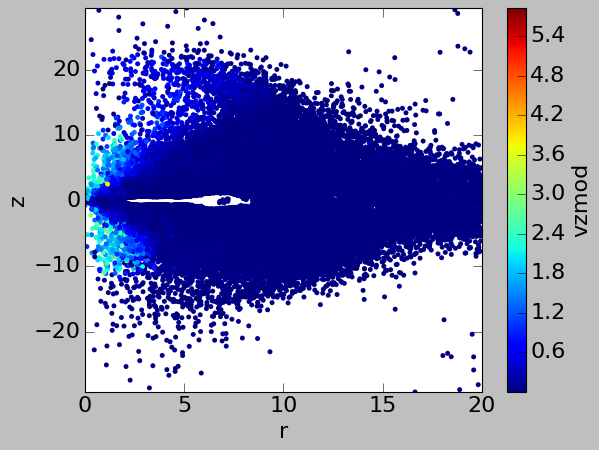

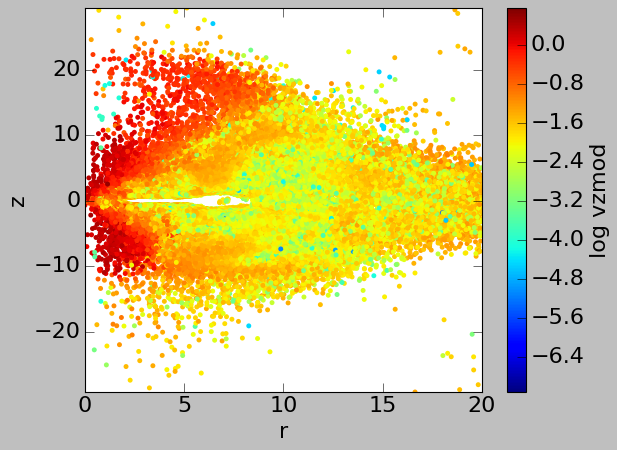

In [8]:
    plt.scatter(sgr,sgz,c=abs(sgvz),edgecolor='none')
    plt.colorbar(label='vzmod')
    plt.xlabel('r')
    plt.ylabel('z')
    plt.xlim(sgr.min(),sgr.max())
    plt.ylim(sgz.min(),sgz.max())
    #plt.savefig(path_save+'cavidad/vz/'+snap+'.png', format='png', dpi=1500,bbox_inches='tight')
    plt.show()
    
    plt.scatter(sgr,sgz,c=np.log10(abs(sgvz)),edgecolor='none')
    plt.colorbar(label='log vzmod')
    plt.xlabel('r')
    plt.ylabel('z')
    plt.xlim(sgr.min(),sgr.max())
    plt.ylim(sgz.min(),sgz.max())
    #plt.savefig(path_save+'cavidad/vz/'+snap+'.png', format='png', dpi=1500,bbox_inches='tight')
    plt.show()    
    

    #plt.scatter(sgr,sgz,c=np.log10(abs(sgvz)),edgecolor='none')
    #plt.colorbar(label='log vzmod')
    #plt.xlabel('r')
    #plt.ylabel('z')
    #plt.savefig(path_save+'cavidad/vz/'+snap+'_log.png', format='png', dpi=1500,bbox_inches='tight')
    #plt.show()

In [24]:
    limrho  = [0.,0.0001]
    limeint = [0.015,eint_s.max()]
    limx    = [-10,10]
    limy    = [-5,5]
    limz    = [-10,10]
    limr    = [0,20]
    limvz   = [0.46,0.5]#vz_s.max()]
    #limvz2   = [vz_s.min(),-1.2]
    
    sgvar2 = [x_s, y_s, z_s, r, rho_s, vx_s, vy_s, vz_s, bx_s, by_s, bz_s, vrms_s, eint_s]
    
    var2   = [4,12,2,3,7,1]
    vlims2 = [limrho,limeint,limz,limr,limvz,limy]
    
    for i in range(len(var2)):
        #print vlims[i]
        if i==0:
            _sgvar2=gf.sobgroup(sgvar2,var2[i],vlims2[i])
            sgvar2=_sgvar2
            print var2[i], _sgvar2[var[i]][0].min(), _sgvar2[var[i]][0].max()
        else:
            _sgvar2=gf.sobgroup([sgvar2[0][0],sgvar2[1][0],sgvar2[2][0],sgvar2[3][0],sgvar2[4][0],\
                               sgvar2[5][0],sgvar2[6][0],sgvar2[7][0],sgvar2[8][0],sgvar2[9][0],\
                               sgvar2[10][0],sgvar2[11][0],sgvar2[12][0]], var2[i],vlims2[i])
            sgvar2=_sgvar2
            #print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
            
            
    sgx2,sgy2,sgz2,sgr2,sgrho2,sgvx2,sgvy2,sgvz2,sgbx2,sgby2,sgbz2,sgvrms2,sgeint2 = gf.subgroup_all(_sgvar2) 


4 2.7520164e-15 9.999993e-05


In [25]:
def lineal_mode(x,a,b):
    return a*x+b

In [26]:
len(sgr2),len(sgz2)

(44, 44)

In [27]:
popt, pcov = curve_fit(lineal_mode, sgr2, sgz2)

In [28]:
popt,pcov

(array([ 2.70672129, -1.56328713]), array([[ 0.06370046, -0.14365577],
        [-0.14365577,  0.36662159]]))

In [29]:
lr=np.linspace(0., sgr2.max())
lz=np.linspace(0., sgz2.max())

In [30]:
np.arctan(popt[0])*180/np.pi

69.7232154505742

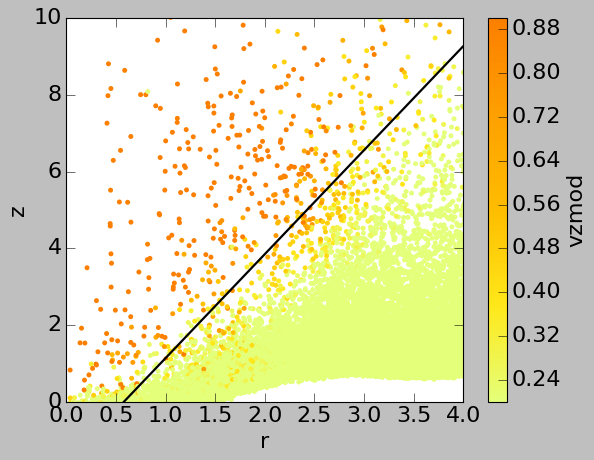

In [42]:
    plt.scatter(sgr  ,sgz ,c=abs(sgvz) ,cmap='Wistia',edgecolor='none',vmin=0.2,vmax=0.9)
    #plt.scatter(sgr2 ,sgz2,c=abs(sgvz2),cmap='Greys',edgecolor='none',vmin=0.2,vmax=0.9)
    plt.plot(lr,lineal_mode(lr,popt[0],popt[1]),lw=2,color="black")
    plt.colorbar(label='vzmod')
    plt.xlabel('r')
    plt.ylabel('z')
    plt.xlim(0,4)
    plt.ylim(0,10)
    #plt.savefig(path_save+'cavidad/vz/'+snap+'.png', format='png', dpi=1500,bbox_inches='tight')
    plt.show()
    
    #plt.scatter(sgr,sgz,c=np.log10(abs(sgvz)),edgecolor='none',vmin=-2,vmax=-9)
    #plt.colorbar(label='log vzmod')
    #plt.xlabel('r')
    #plt.ylabel('z')
    #plt.xlim(sgr.min(),sgr.max())
    #plt.ylim(sgz.min(),sgz.max())
    #plt.savefig(path_save+'cavidad/vz/'+snap+'.png', format='png', dpi=1500,bbox_inches='tight')
    #plt.show()    

In [41]:
    limrho  = [0.,0.0001]
    limeint = [0.015,eint_s.max()]
    limx    = [-10,10]
    limy    = [-1,1]
    limz    = [-30,30]
    limr    = [0,20]
    limvz   = [0.41,vz_s.max()]
    #limvz2   = [vz_s.min(),-1.2]
    
    sgvar = [x_s, y_s, z_s, r, rho_s, vx_s, vy_s, vz_s, bx_s, by_s, bz_s, vrms_s, eint_s]
    
    var   = [4,12,2,3,7]
    vlims = [limrho,limeint,limz,limr,limvz]
    
    for i in range(len(var)):
        #print vlims[i]
        if i==0:
            _sgvar=gf.sobgroup(sgvar,var[i],vlims[i])
            sgvar=_sgvar
            print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
        else:
            _sgvar=gf.sobgroup([sgvar[0][0],sgvar[1][0],sgvar[2][0],sgvar[3][0],sgvar[4][0],\
                               sgvar[5][0],sgvar[6][0],sgvar[7][0],sgvar[8][0],sgvar[9][0],\
                               sgvar[10][0],sgvar[11][0],sgvar[12][0]], var[i],vlims[i])
            sgvar=_sgvar
            #print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
            
            
    sgx,sgy,sgz,sgr,sgrho,sgvx,sgvy,sgvz,sgbx,sgby,sgbz,sgvrms,sgeint = gf.subgroup_all(_sgvar) 

4 2.7520164e-15 9.999993e-05


In [42]:
    plt.scatter(sgr,sgz,c=abs(sgvz),edgecolor='none')
    plt.colorbar(label='vzmod')
    plt.xlabel('r')
    plt.ylabel('z')
    plt.xlim(sgr.min(),sgr.max())
    plt.ylim(sgz.min(),sgz.max())
    #plt.savefig(path_save+'cavidad/vz/'+snap+'.png', format='png', dpi=1500,bbox_inches='tight')
    plt.show()
    
    plt.scatter(sgr,sgz,c=np.log10(abs(sgvz)),edgecolor='none')
    plt.colorbar(label='log vzmod')
    plt.xlabel('r')
    plt.ylabel('z')
    plt.xlim(sgr.min(),sgr.max())
    plt.ylim(sgz.min(),sgz.max())
    #plt.savefig(path_save+'cavidad/vz/'+snap+'.png', format='png', dpi=1500,bbox_inches='tight')
    plt.show() 

AttributeError: 'NoneType' object has no attribute 'sqrt'

<IPython.core.display.Javascript object>


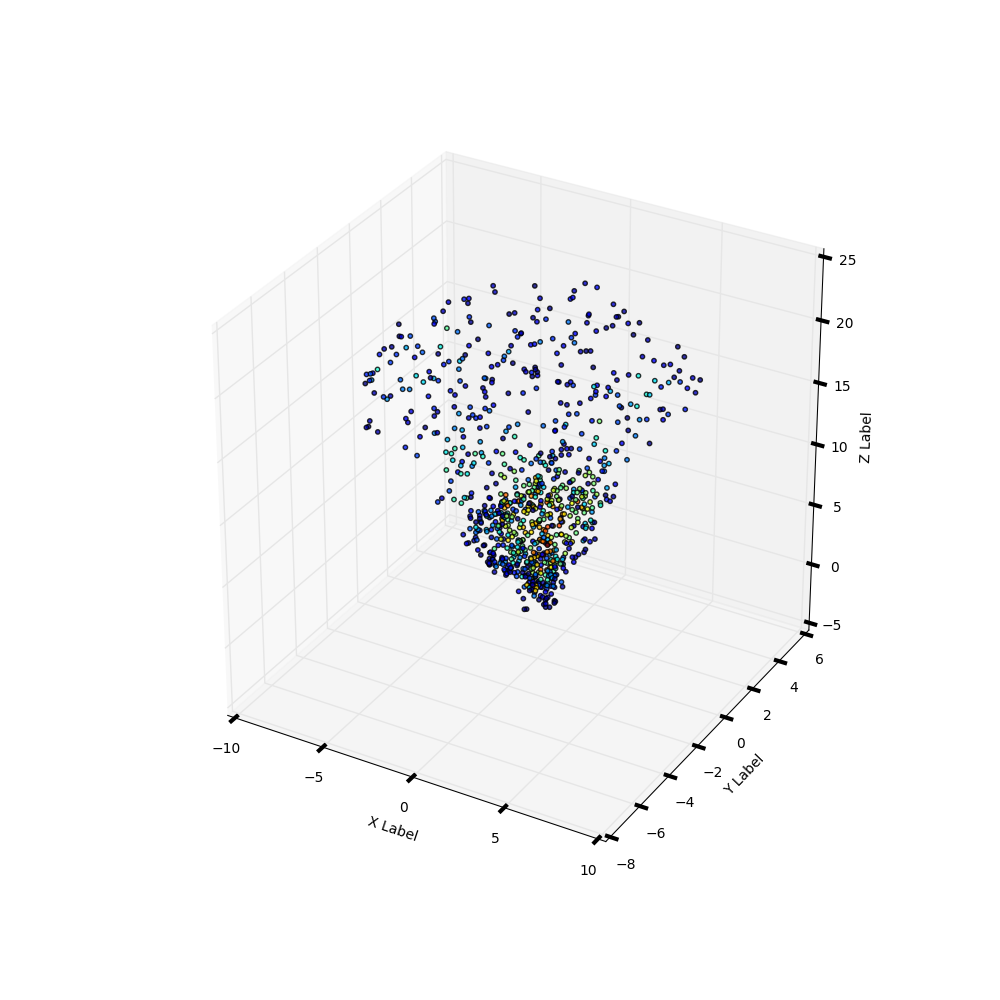

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sgx, sgy, sgz, c=np.log10(abs(sgvz)), cmap='jet',s=10,edgecolor='none',alpha=0.8)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [38]:
rc   = (sgx**2+sgy**2)**0.5
phic = np.arctan2(sgy,sgx)
zc   = sgz

limphi=[0,np.pi/18.]

rcg   = rc[  (phic<limphi[1])&(phic>limphi[0])&(rc<8)&(zc>0)&(zc<20)]
phicg = phic[(phic<limphi[1])&(phic>limphi[0])&(rc<8)&(zc>0)&(zc<20)]
zcg   = zc[  (phic<limphi[1])&(phic>limphi[0])&(rc<8)&(zc>0)&(zc<20)]
vzcg  = sgvz[(phic<limphi[1])&(phic>limphi[0])&(rc<8)&(zc>0)&(zc<20)]

In [40]:
rc

array([4.1037426 , 0.7481962 , 1.2309947 , 0.45480472, 2.2833383 ,
       2.0099347 , 0.38617998, 1.4976708 , 2.151465  , 0.96367925,
       1.1184852 , 1.7606169 , 2.369783  , 2.4611804 , 1.1368197 ,
       0.30281395, 2.0978305 , 1.9489743 , 1.268546  , 1.7311943 ,
       1.0311693 , 2.5564842 , 1.4963732 , 3.9168248 , 1.1998816 ,
       2.4125154 , 1.5161644 , 1.8091114 , 0.626926  , 3.2746747 ,
       1.5069144 , 0.6151156 , 0.8008126 , 2.3964615 , 1.9500208 ,
       2.4548762 , 2.4095635 , 1.4608036 , 2.933668  , 1.0046564 ,
       2.0355427 , 2.137592  , 1.8290377 , 1.4837716 , 1.9847057 ,
       0.6925306 , 1.1453648 , 2.3198922 , 5.1006002 , 1.4857718 ,
       2.7930856 , 1.731322  , 1.7389041 , 2.4775662 , 1.7473782 ,
       3.179992  , 4.8000593 , 3.564863  , 2.1782136 , 1.4640888 ,
       2.4743853 , 2.53588   , 3.4680526 , 5.4737463 , 6.6314583 ,
       2.5636687 , 6.653232  , 6.9917593 , 4.603511  , 5.580699  ,
       7.7127824 , 1.9216809 , 7.953871  , 4.4931884 , 2.31506

In [39]:
    plt.scatter(rcg,zcg,c=abs(vzcg),edgecolor='none')
    plt.colorbar(label='vzmod')
    plt.xlabel('r')
    plt.ylabel('z')
    plt.xlim(rcg.min(),rcg.max())
    plt.ylim(zcg.min(),zcg.max())
    #plt.savefig(path_save+'cavidad/vz/'+snap+'.png', format='png', dpi=1500,bbox_inches='tight')
    plt.show()
    
    plt.scatter(rcg,zcg,c=np.log10(abs(vzcg)),edgecolor='none')
    plt.colorbar(label='log vzmod')
    plt.xlabel('r')
    plt.ylabel('z')
    plt.xlim(rcg.min(),rcg.max())
    plt.ylim(zcg.min(),zcg.max())
    #plt.savefig(path_save+'cavidad/vz/'+snap+'.png', format='png', dpi=1500,bbox_inches='tight')
    plt.show()

AttributeError: 'NoneType' object has no attribute 'sqrt'